In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

binary_train_images = train_images[(train_labels == 1) | (train_labels == 7)]
binary_train_labels = train_labels[(train_labels == 1) | (train_labels == 7)]

binary_test_images = test_images[(test_labels == 1) | (test_labels == 7)]
binary_test_labels = test_labels[(test_labels == 1) | (test_labels == 7)]

binary_train_images = binary_train_images / 255.0
binary_test_images = binary_test_images / 255.0

categorical_train_labels = ((binary_train_labels == 1).astype(np.float64).reshape((-1, 1)))
categorical_test_labels = (binary_test_labels == 1).astype(np.float64).reshape((-1, 1))

In [3]:
shapley_data = np.load("../output/shapley_model_on_binary_mnist_lr.npz")
shapley_values = shapley_data["shapley_values"]

## Most/Least Valuable Points

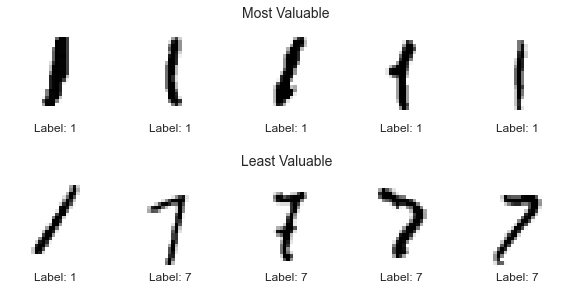

In [4]:
# Using loss as performance metric, so negative values are helpful, and positive values are harmful.
shapley_idxs = np.argsort(shapley_values)

cols = 5

fig, ax = plt.subplots(
    2,
    cols,
    subplot_kw={'xticks':[], 'yticks':[]},
    figsize=(2*cols, 5)
)

ax[0, cols//2].set_title("Most Valuable", fontdict={'fontsize': 14})
ax[1, cols//2].set_title("Least Valuable", fontdict={'fontsize': 14})

for i in range(cols):
    
    ax[0, i].imshow(binary_train_images[shapley_idxs[i]], cmap=plt.cm.binary)
    ax[0, i].set_xlabel("Label: {}".format(binary_train_labels[shapley_idxs[i]]))
    
    ax[1, i].imshow(binary_train_images[shapley_idxs[-i-1]], cmap=plt.cm.binary)
    ax[1, i].set_xlabel("Label: {}".format(binary_train_labels[shapley_idxs[-i-1]]))

## Overall Distribution

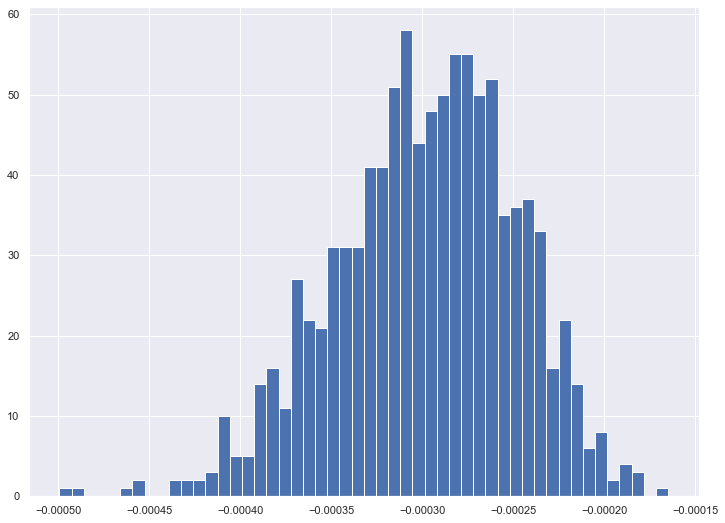

In [5]:
plt.figure(figsize=(12, 9))
plt.hist(shapley_values, bins=50)
plt.show()